# **Probability Density Functions using Roll-Number-Parameterized Non-Linear Model**

Dataset: Consider NO2 as feature (x).

Link: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data

**Step-1**: Transform each value of x into z using the transformation function given below.

z = Tr(x) = x + arsin(brx)          ----(1)

where

ar = 0.05 * (r mod 7),

br = 0.3 * (r mod 5 + 1)

where, mod returns remainder and r is my UNIVERSITY ROLL NUMBER.

**SOLUTION:**

In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv", encoding="latin1")
x = df["no2"].dropna().values
r = 102317014
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)
z = x + ar * np.sin(br * x)

print("ar =", ar)
print("br =", br)
print("Number of transformed samples:", len(z))

ar = 0.1
br = 1.5
Number of transformed samples: 419509


/tmp/ipython-input-274077922.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


**Step-2**: Learn parameters of the following probability density function using any
estimation technique or by using any machine learning technique.

p̂(z) = c * e^(-λ(z-μ)^2)          ----(2)

Where, p̂(z) is the predicted probability of the transformed variable z.

In this step, you have to learn parameters λ, μ and c in Eq.(2).

**SOLUTION:**

*The given equation represents a Gaussian probability density function.*

*Hence, the parameters are estimated using Maximum Likelihood Estimation (MLE).*

In [9]:
mu = np.mean(z)
sigma2 = np.var(z)
lam = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

print(f"Estimated Parameters:")
print(f"mu = {mu}")
print(f"lambda = {lam}")
print(f"c = {c}")

Estimated Parameters:
mu = 25.812999155899675
lambda = 0.001460976048430844
c = 0.021564858443617625


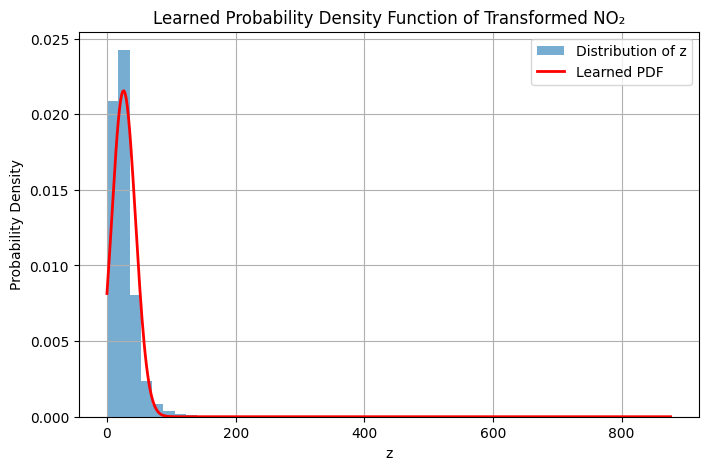

In [10]:
import matplotlib.pyplot as plt

z_grid=np.linspace(z.min(),z.max(),500)
pdf = c*np.exp(-lam*(z_grid-mu)**2)

plt.figure(figsize=(8,5))
plt.hist(z,bins=50,density=True,alpha=0.6,label="Distribution of z")
plt.plot(z_grid,pdf,'r',linewidth=2,label="Learned PDF")

plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Learned Probability Density Function of Transformed NO₂")
plt.legend()
plt.grid(True)
plt.show()
